# Compute inter-individual distances across age for all datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [2]:
def animal_dist(df, metric='jensenshannon'):
    inter_ind_dists = pdist(df, metric=metric)
    d = squareform(inter_ind_dists)
    d[np.diag_indices_from(d)] = np.nan
    d = np.nanmean(d, axis=1)
    return d

## V11

In [3]:
iids = []

### Ont males

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]

In [5]:
iid_avg_df = []
for age, _df in df.groupby("age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'ont_male'
iids.append(iid_avg_df)

### Ont females

In [6]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 100')

In [7]:
iid_avg_df = []
for age, _df in df.groupby("age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'ont_female'
iids.append(iid_avg_df)

### Long males

In [8]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')
ages = df.index.get_level_values('age')
weeks = (ages * 7) // 7
df['binned_age'] = weeks
df = df.set_index('binned_age', append=True)
sample = df.groupby(['mouse', 'binned_age']).first()

In [9]:
iid_avg_df = []
for age, _df in sample.groupby("binned_age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'long_male'
iids.append(iid_avg_df)

### Longv2 females

In [10]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_v2_females_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')
ages = df.index.get_level_values('age')
weeks = (ages * 7) // 7
df['binned_age'] = weeks
df = df.set_index('binned_age', append=True)
sample = df.groupby(['mouse', 'binned_age']).first()

In [11]:
iid_avg_df = []
for age, _df in sample.groupby("binned_age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'long_v2_female'
iids.append(iid_avg_df)

## Long v2 males

In [12]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_v2_males_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')
ages = df.index.get_level_values('age')
weeks = (ages * 7) // 7
df['binned_age'] = weeks
df = df.set_index('binned_age', append=True)
sample = df.groupby(['mouse', 'binned_age']).first()

In [13]:
iid_avg_df = []
for age, _df in sample.groupby("binned_age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'long_v2_male'
iids.append(iid_avg_df)

In [14]:
out = pd.concat(iids)

<Axes: xlabel='age', ylabel='iid_jsd'>

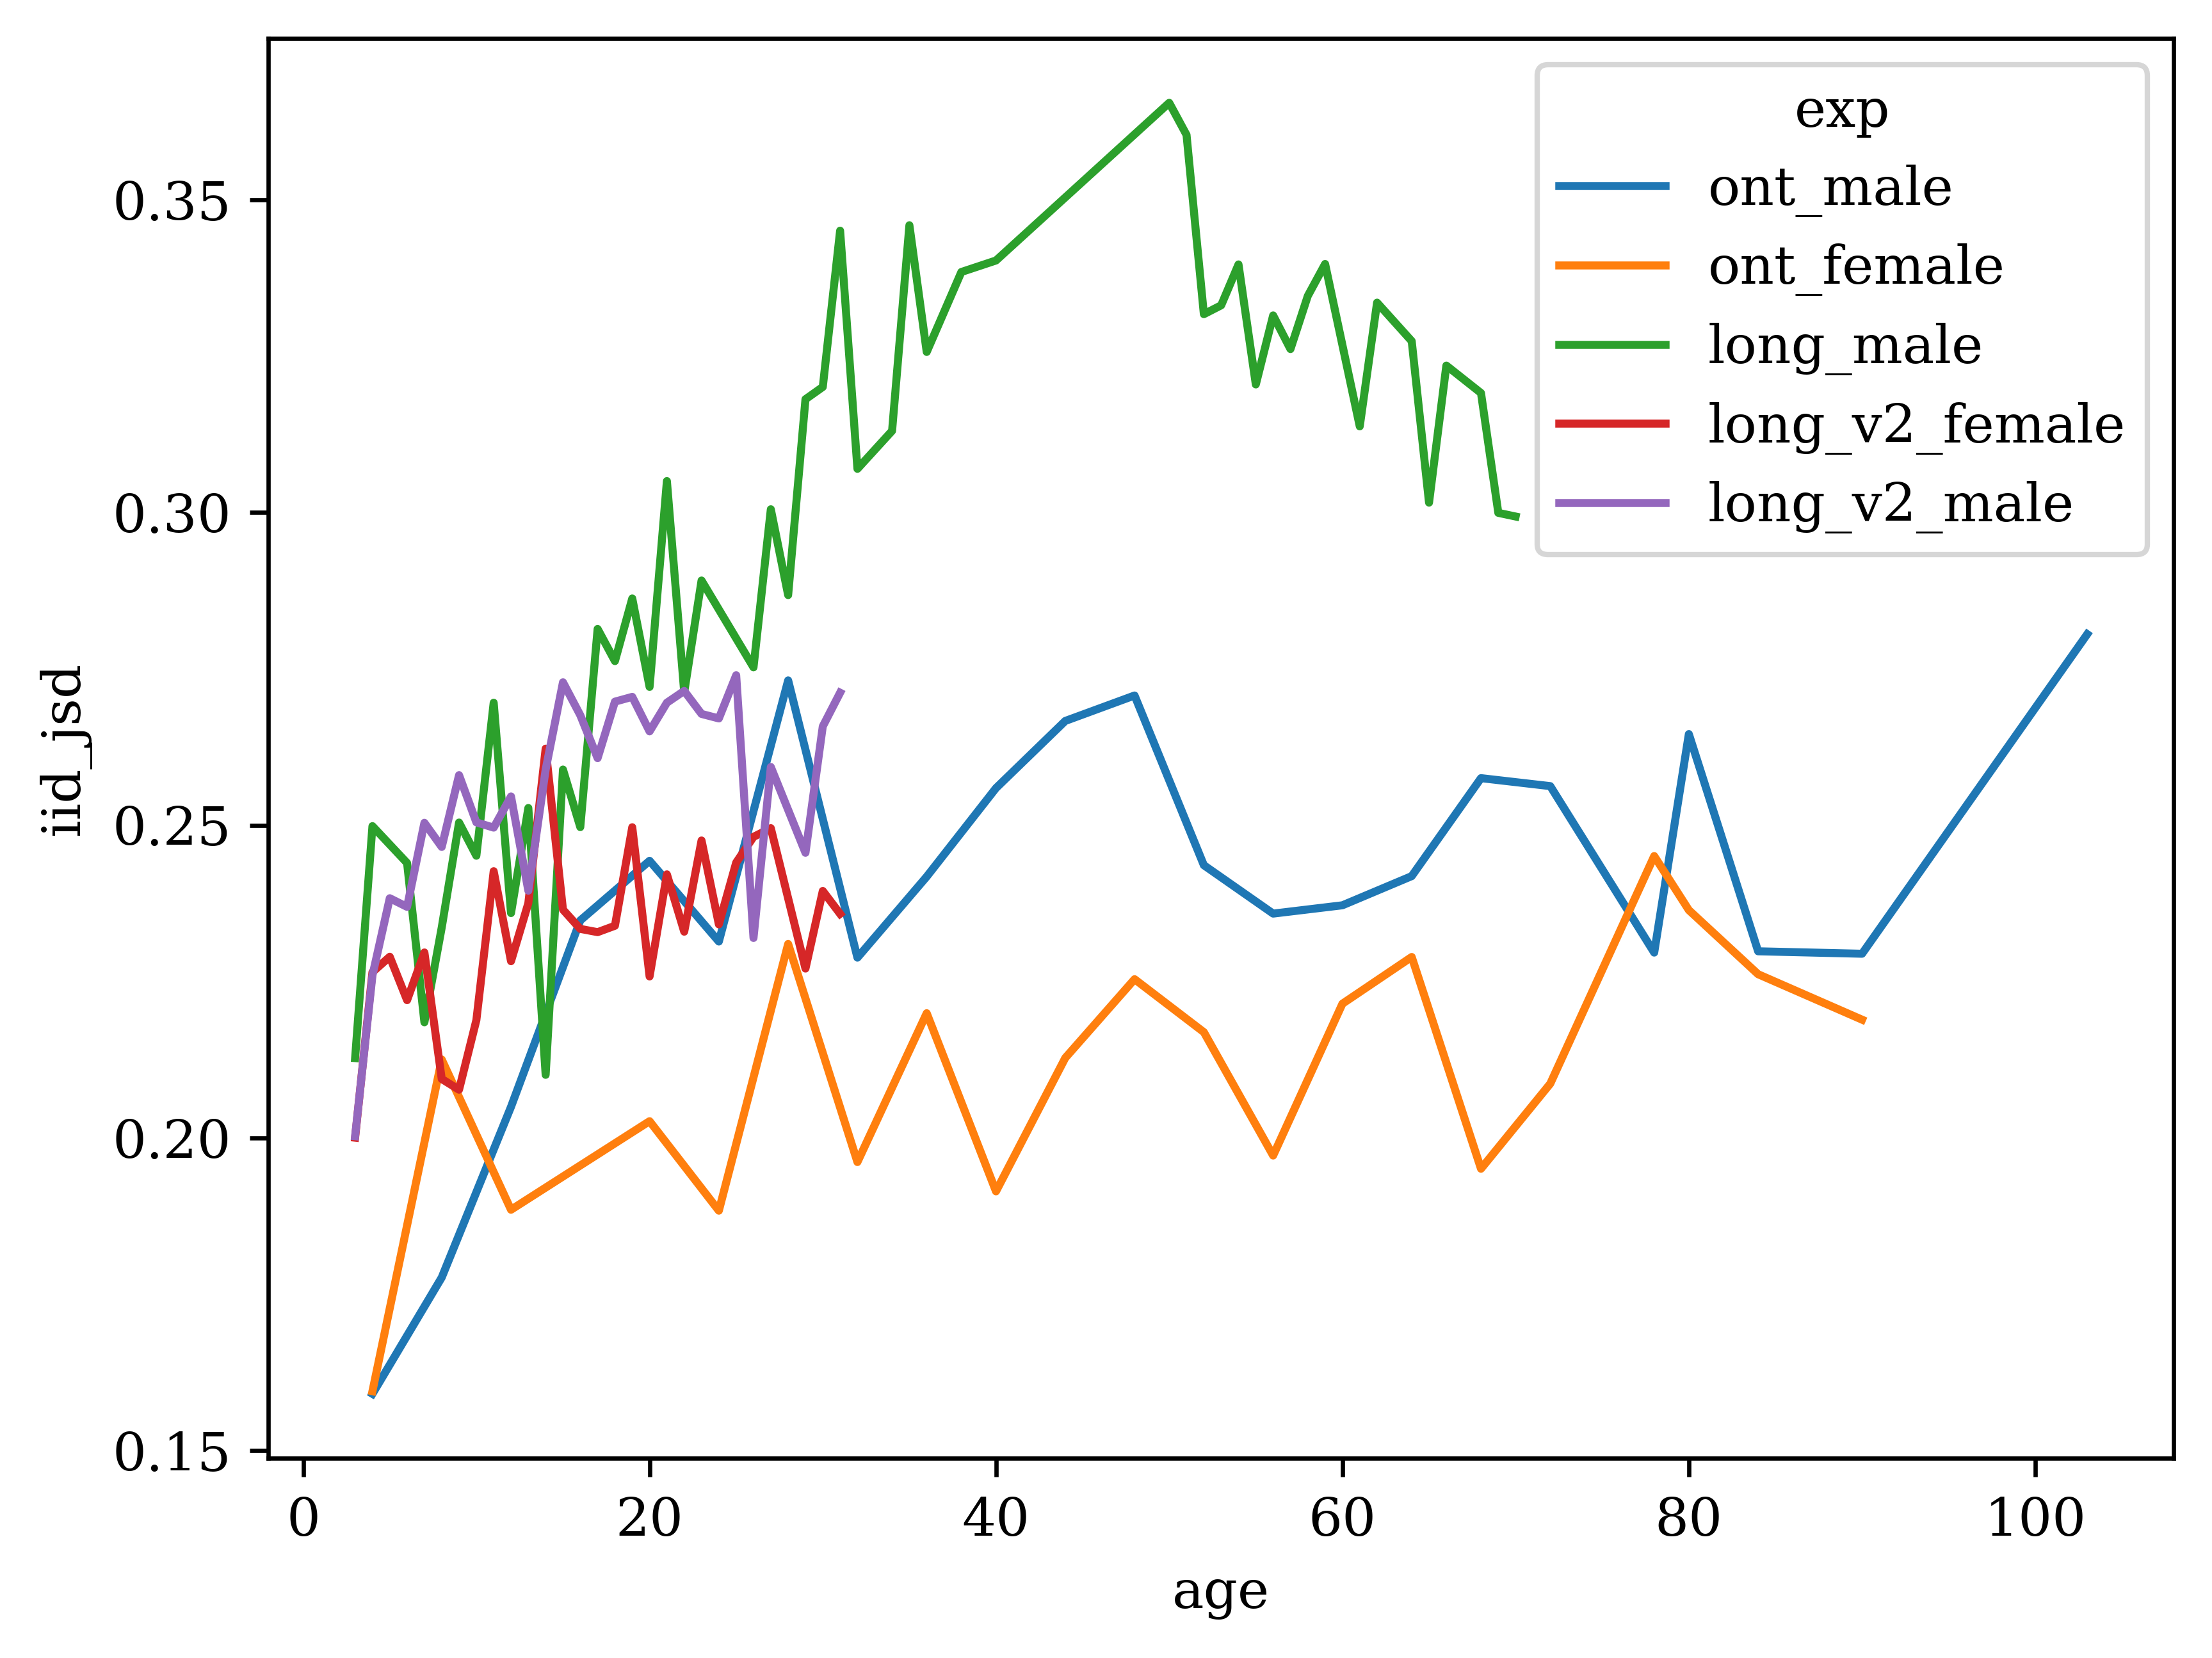

In [15]:
sns.lineplot(data=out.reset_index(), x='age', y='iid_jsd', hue='exp')

<Axes: xlabel='age', ylabel='iid_cos'>

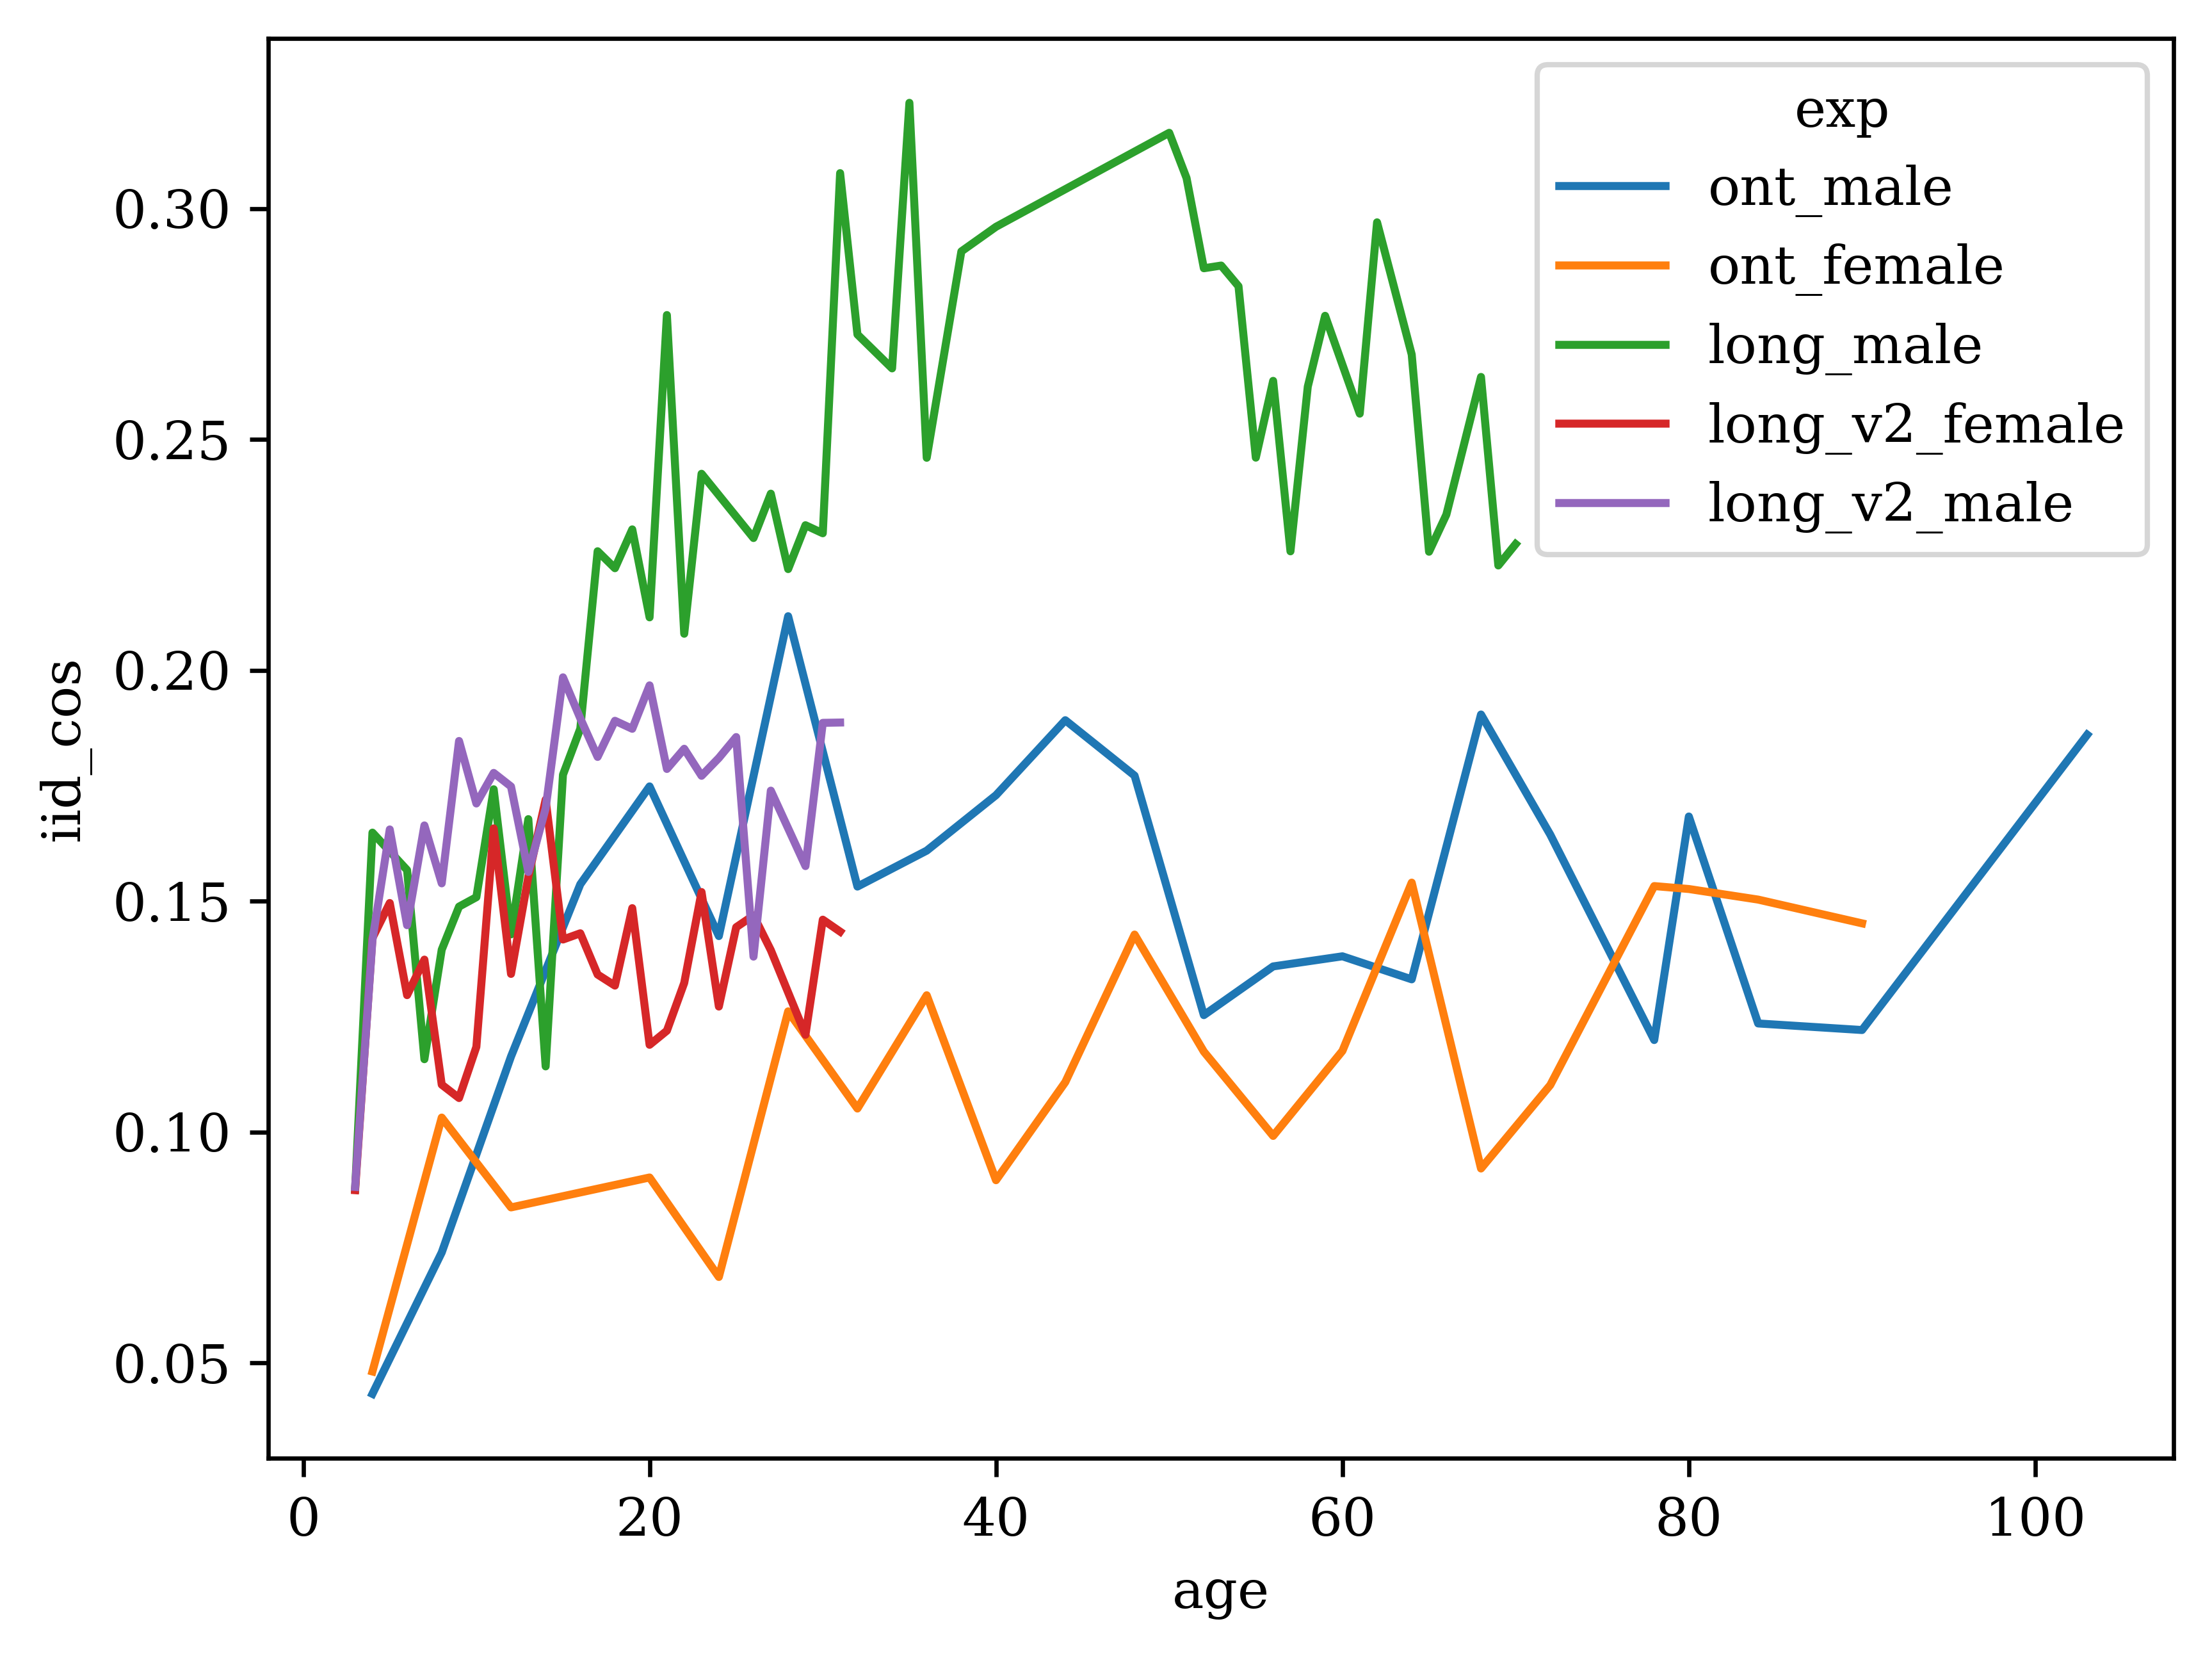

In [16]:
sns.lineplot(data=out.reset_index(), x='age', y='iid_cos', hue='exp')

<Axes: xlabel='age', ylabel='iid_euc'>

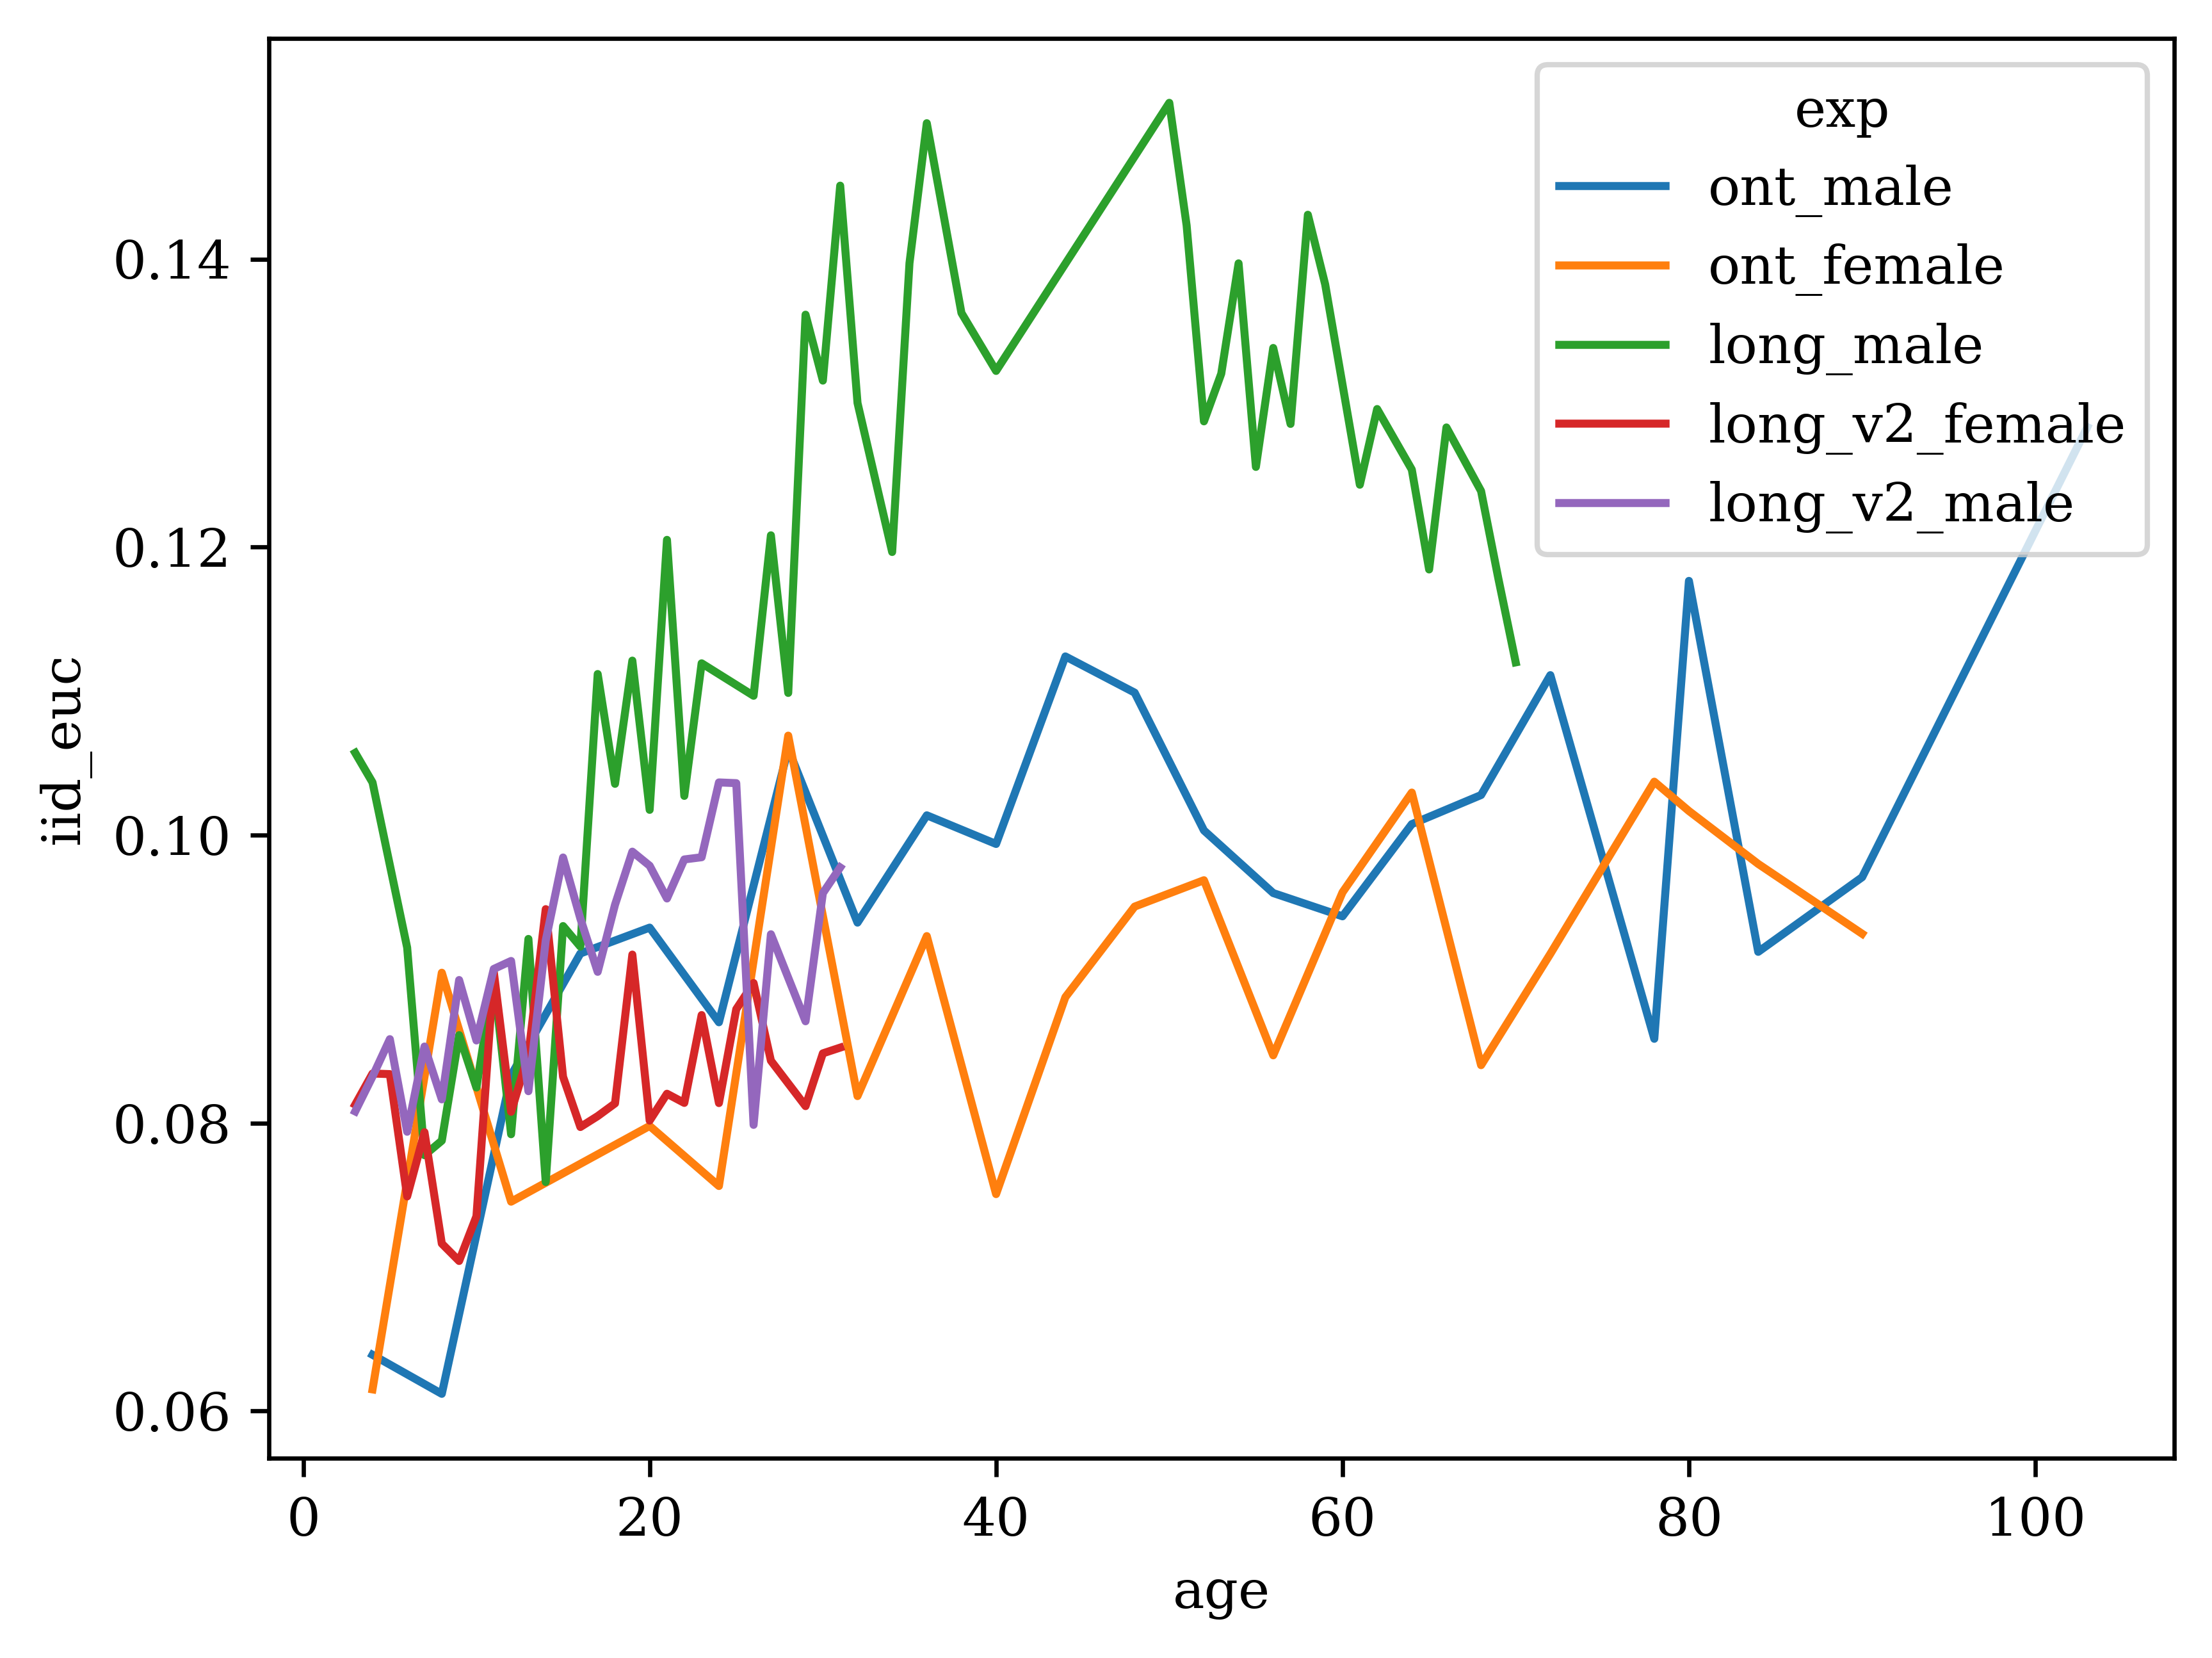

In [17]:
sns.lineplot(data=out.reset_index(), x='age', y='iid_euc', hue='exp')

## V12

In [19]:
iids = []

### Ont males

In [20]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_syllables]

In [21]:
iid_avg_df = []
for age, _df in df.groupby("age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'ont_male'
iids.append(iid_avg_df)

### Ont females

In [22]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 100')

In [23]:
iid_avg_df = []
for age, _df in df.groupby("age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'ont_female'
iids.append(iid_avg_df)

### Long males

In [24]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/longtogeny_males_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')
ages = df.index.get_level_values('age')
weeks = (ages * 7) // 7
df['binned_age'] = weeks
df = df.set_index('binned_age', append=True)
sample = df.groupby(['mouse', 'binned_age']).first()

In [25]:
iid_avg_df = []
for age, _df in sample.groupby("binned_age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'long_male'
iids.append(iid_avg_df)

### Longv2 females

In [26]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/longtogeny_v2_females_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')
ages = df.index.get_level_values('age')
weeks = (ages * 7) // 7
df['binned_age'] = weeks
df = df.set_index('binned_age', append=True)
sample = df.groupby(['mouse', 'binned_age']).first()

In [27]:
iid_avg_df = []
for age, _df in sample.groupby("binned_age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'long_v2_female'
iids.append(iid_avg_df)

## Long v2 males

In [28]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_12/longtogeny_v2_males_raw_usage_matrix_v00.parquet').astype(float)
df = df[keep_syllables]
df = df.query('age < 90')
ages = df.index.get_level_values('age')
weeks = (ages * 7) // 7
df['binned_age'] = weeks
df = df.set_index('binned_age', append=True)
sample = df.groupby(['mouse', 'binned_age']).first()

In [29]:
iid_avg_df = []
for age, _df in sample.groupby("binned_age"):
    jsd = animal_dist(_df, "jensenshannon")
    euc = animal_dist(_df, "euclidean")
    cos = animal_dist(_df, "cosine")
    iid_avg_df.append(
        pd.DataFrame(dict(iid_jsd=jsd, iid_euc=euc, iid_cos=cos, age=age))
    )
iid_avg_df = pd.concat(iid_avg_df).groupby("age").mean()
iid_avg_df['exp'] = 'long_v2_male'
iids.append(iid_avg_df)

In [30]:
out = pd.concat(iids)

<Axes: xlabel='age', ylabel='iid_jsd'>

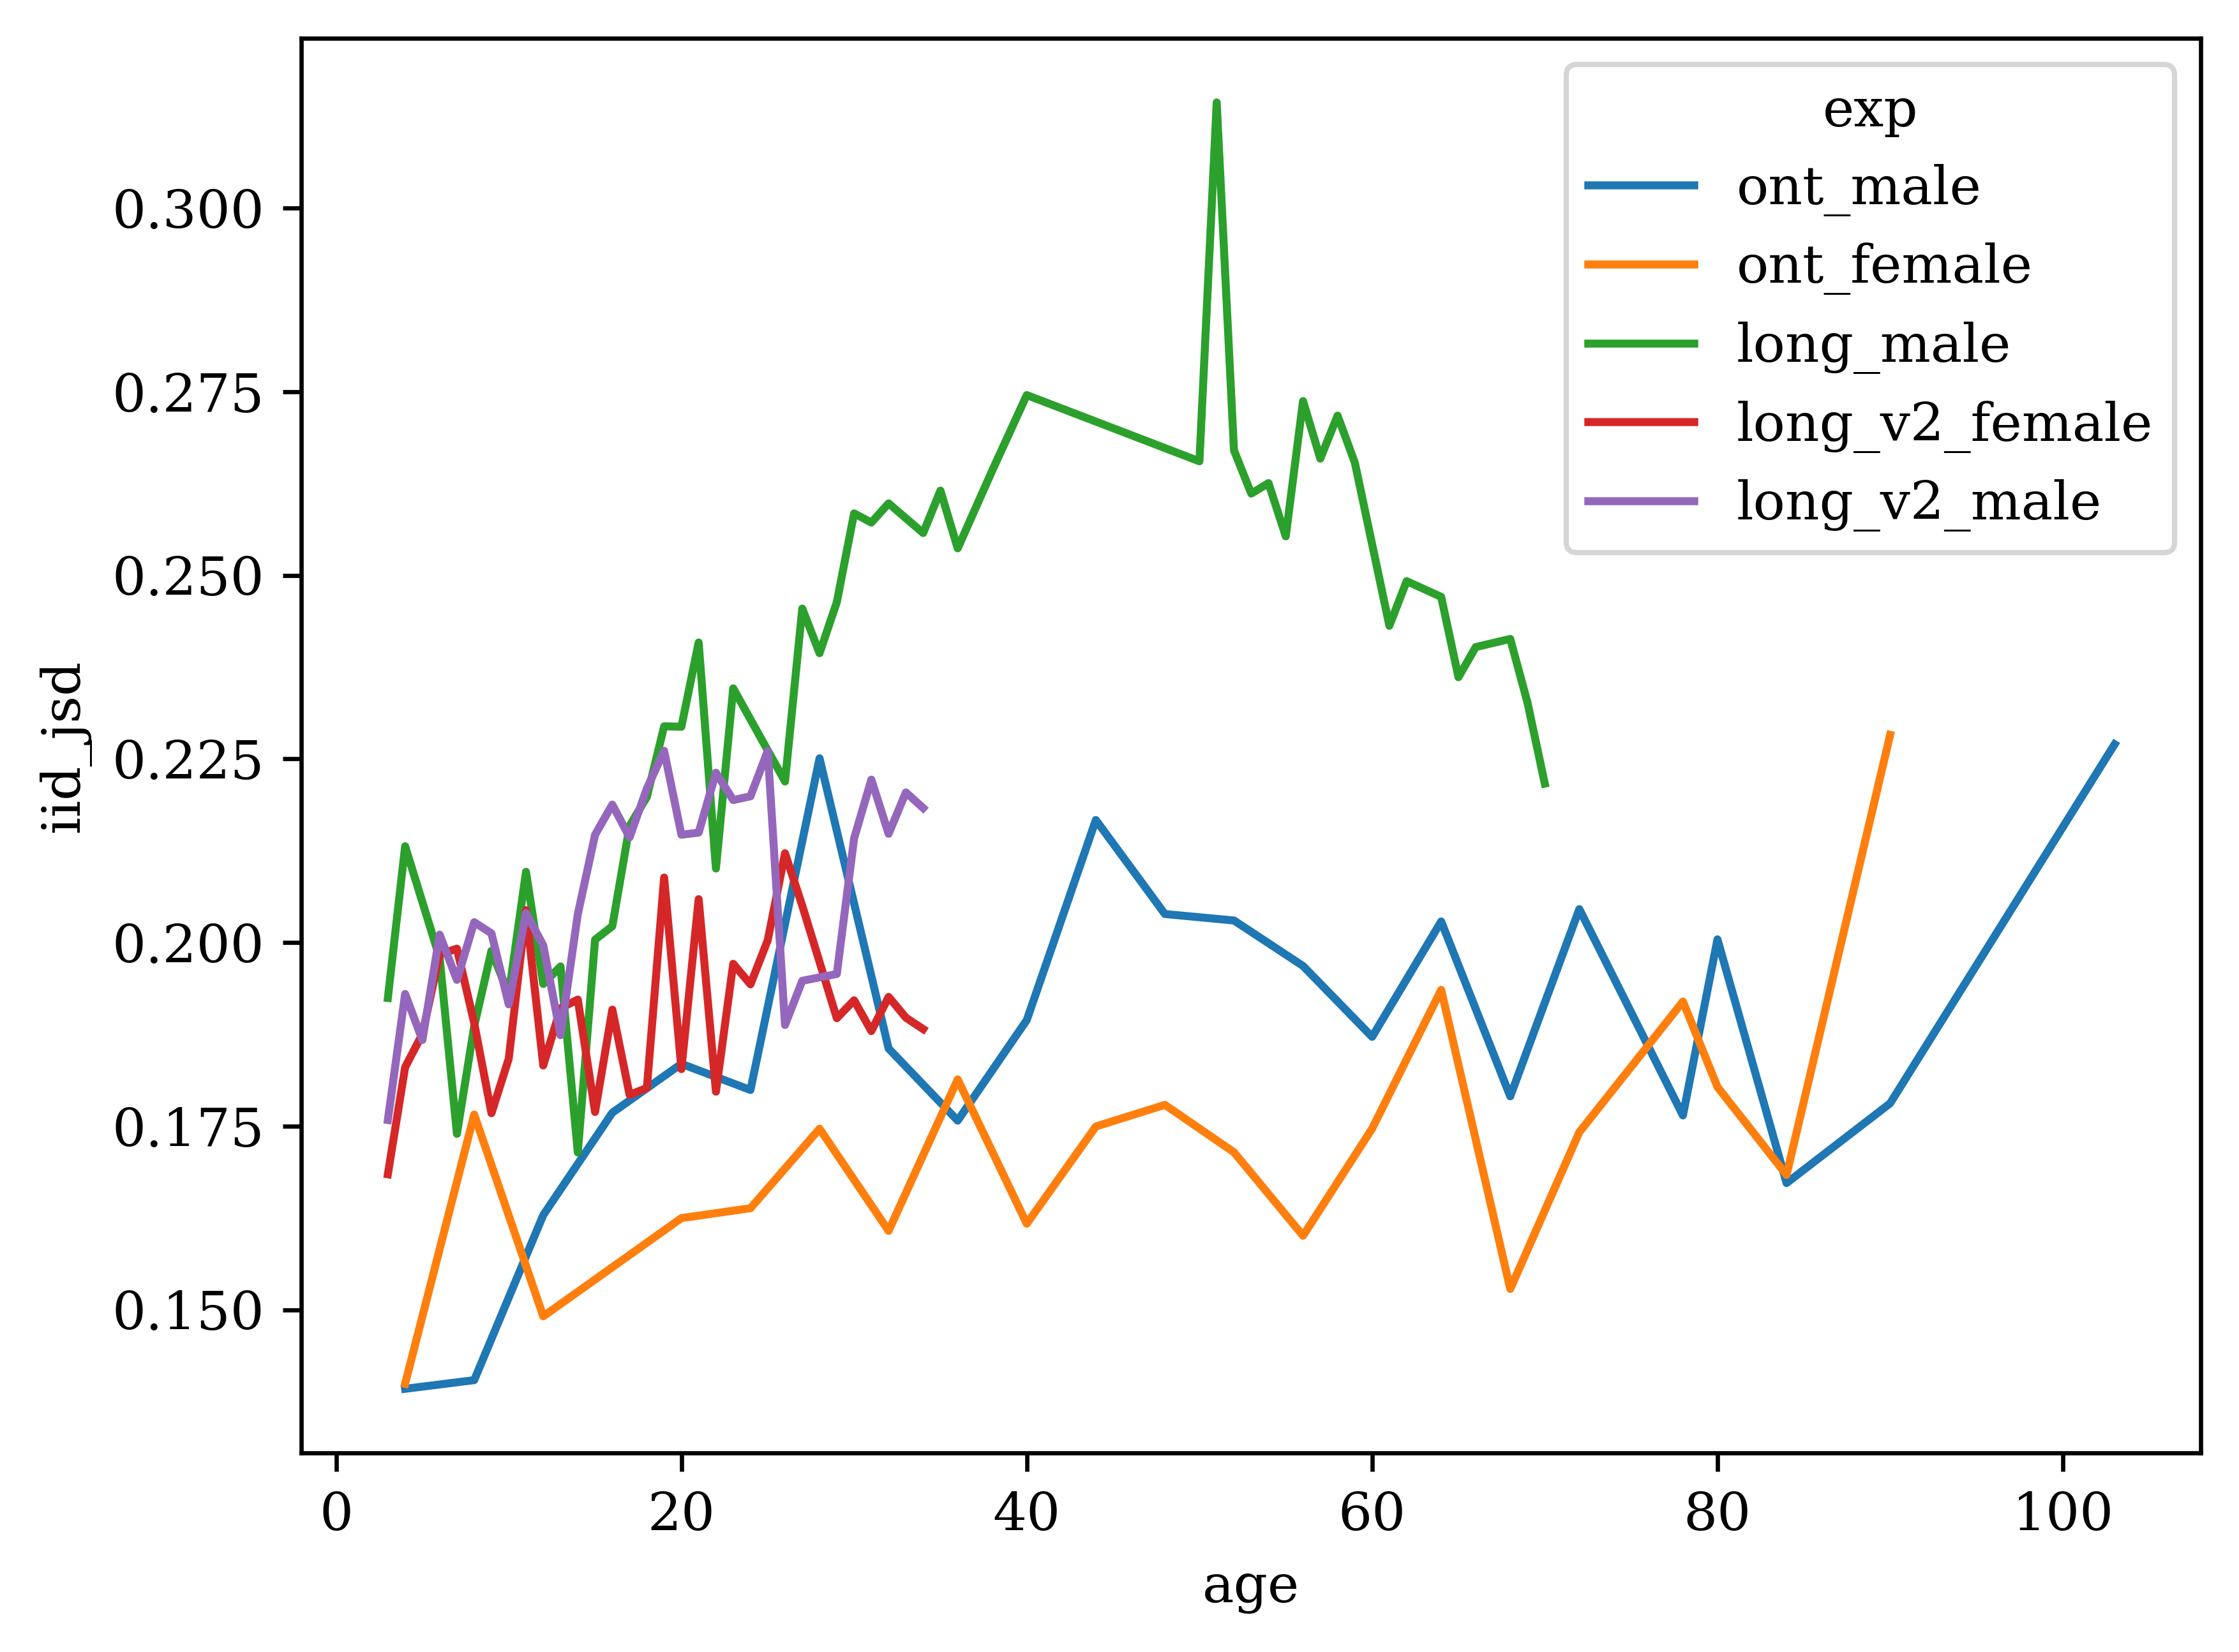

In [31]:
sns.lineplot(data=out.reset_index(), x='age', y='iid_jsd', hue='exp')

<Axes: xlabel='age', ylabel='iid_cos'>

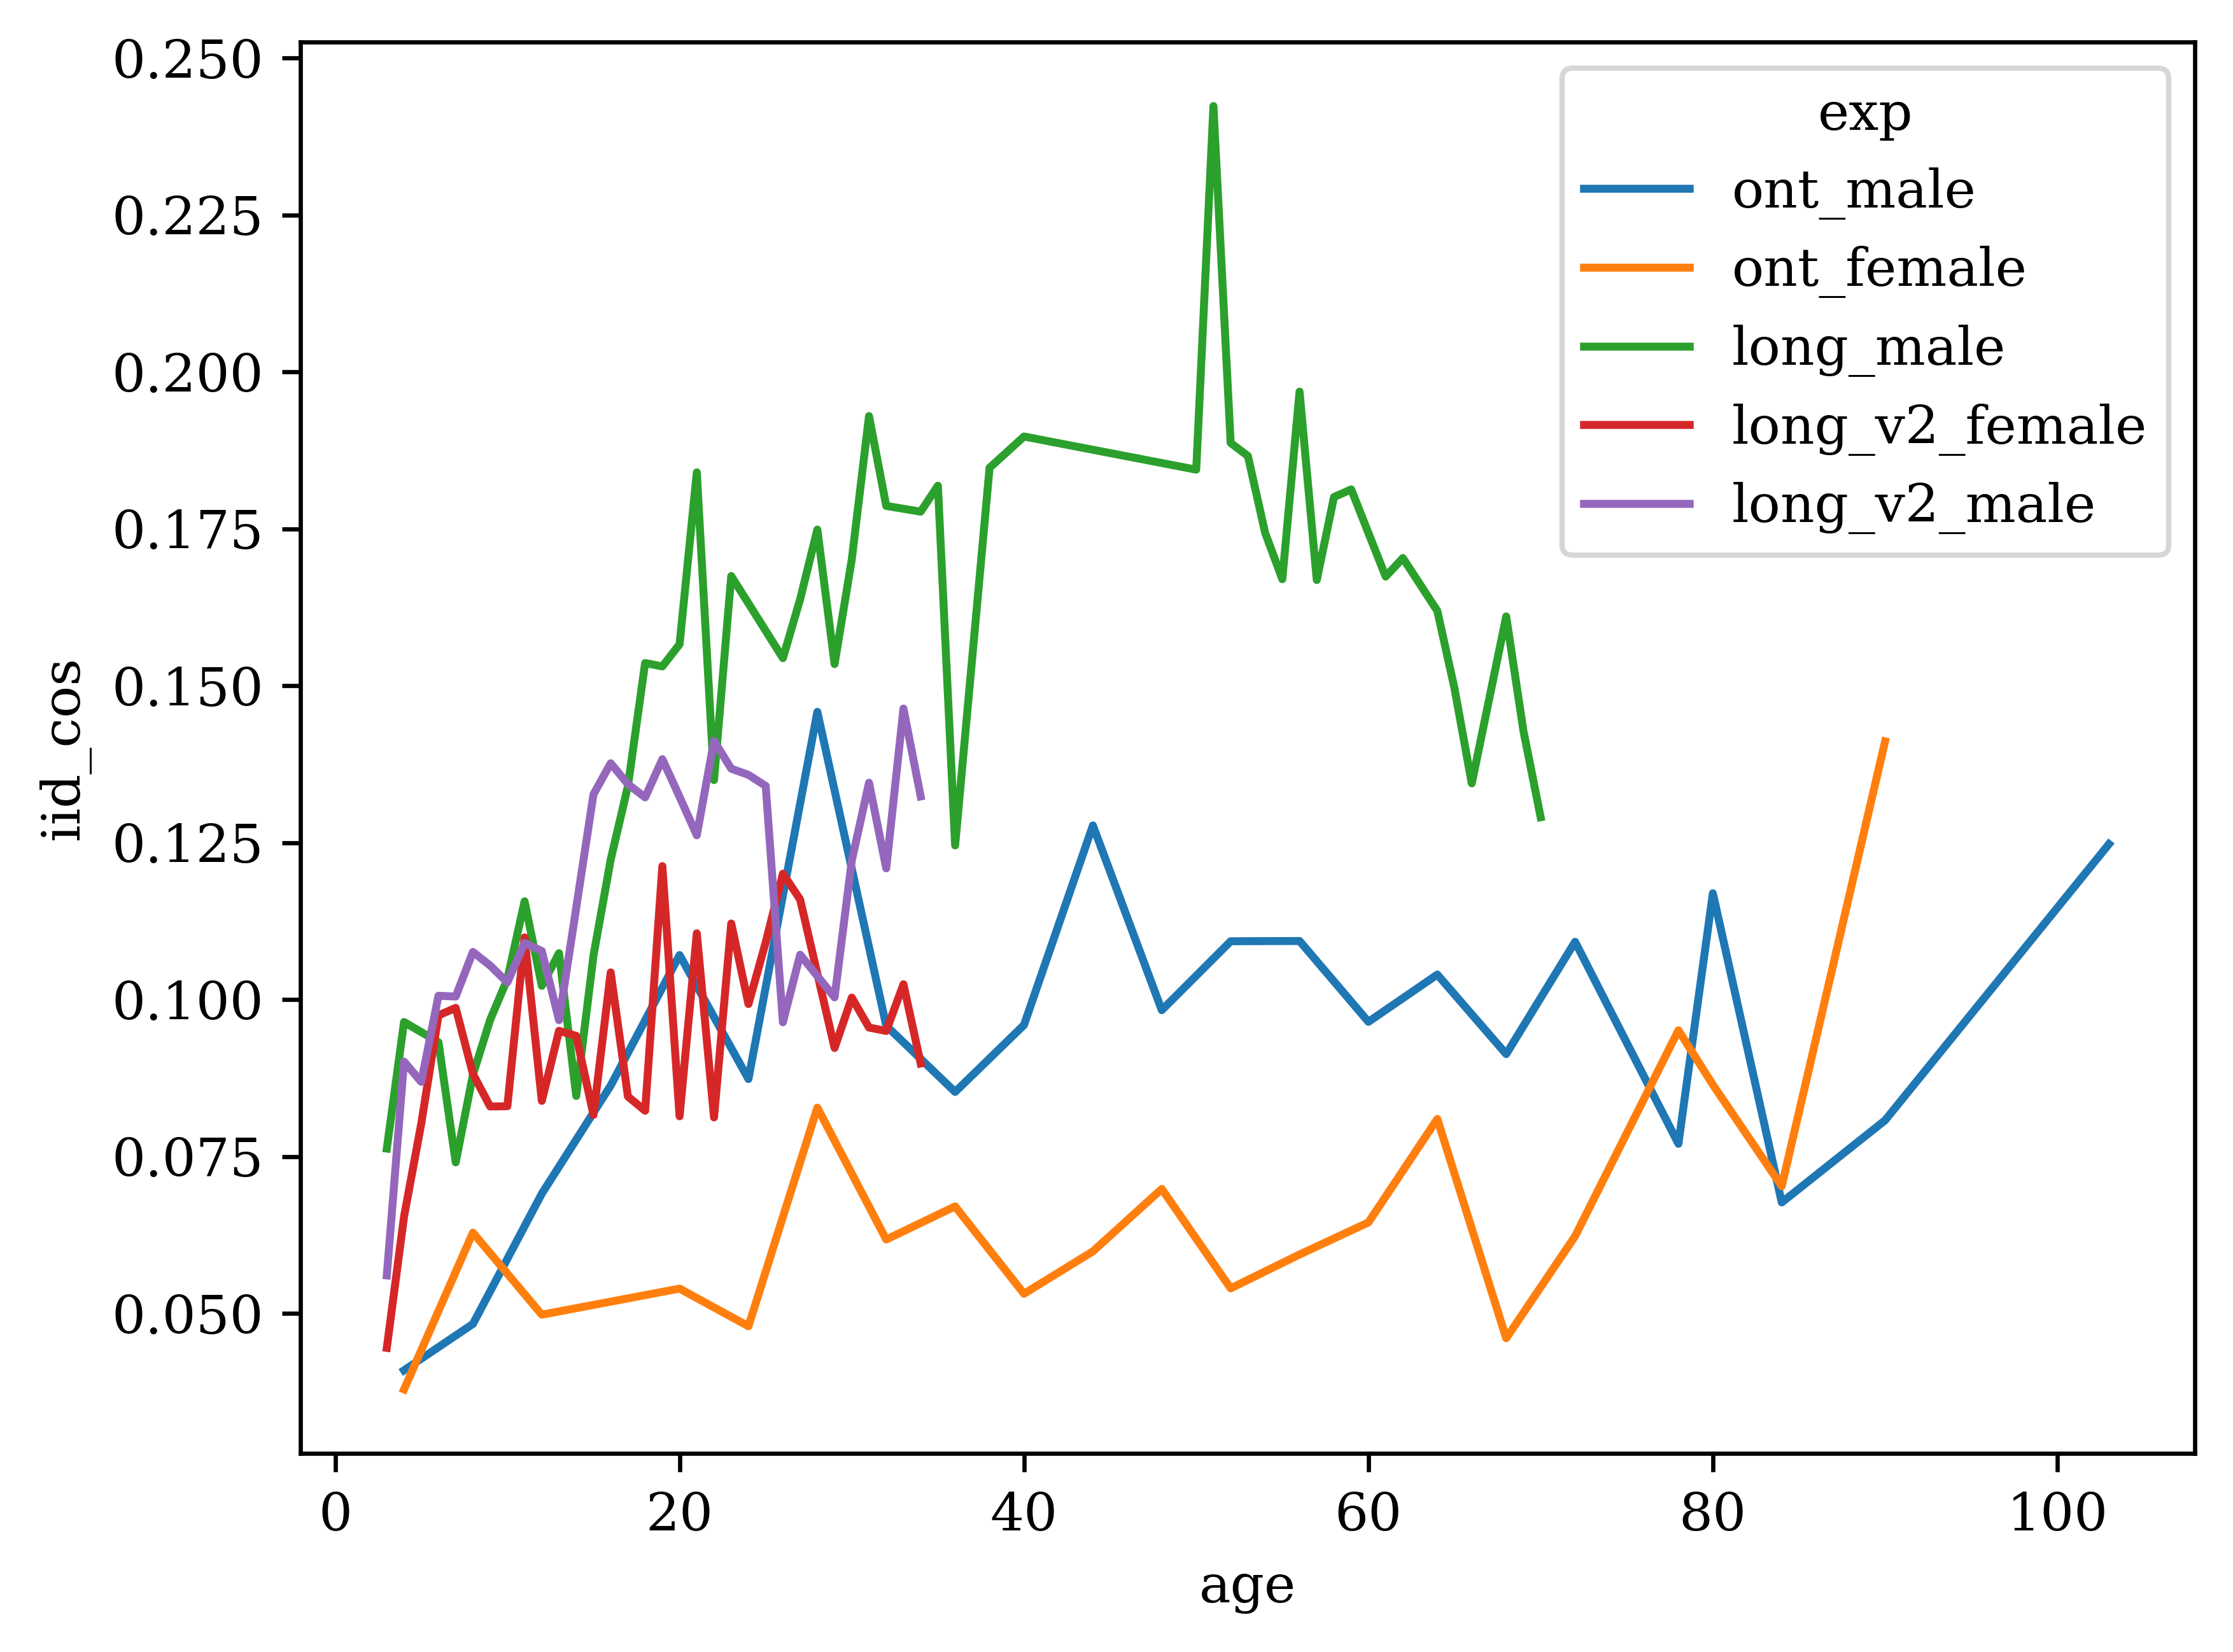

In [32]:
sns.lineplot(data=out.reset_index(), x='age', y='iid_cos', hue='exp')

<Axes: xlabel='age', ylabel='iid_euc'>

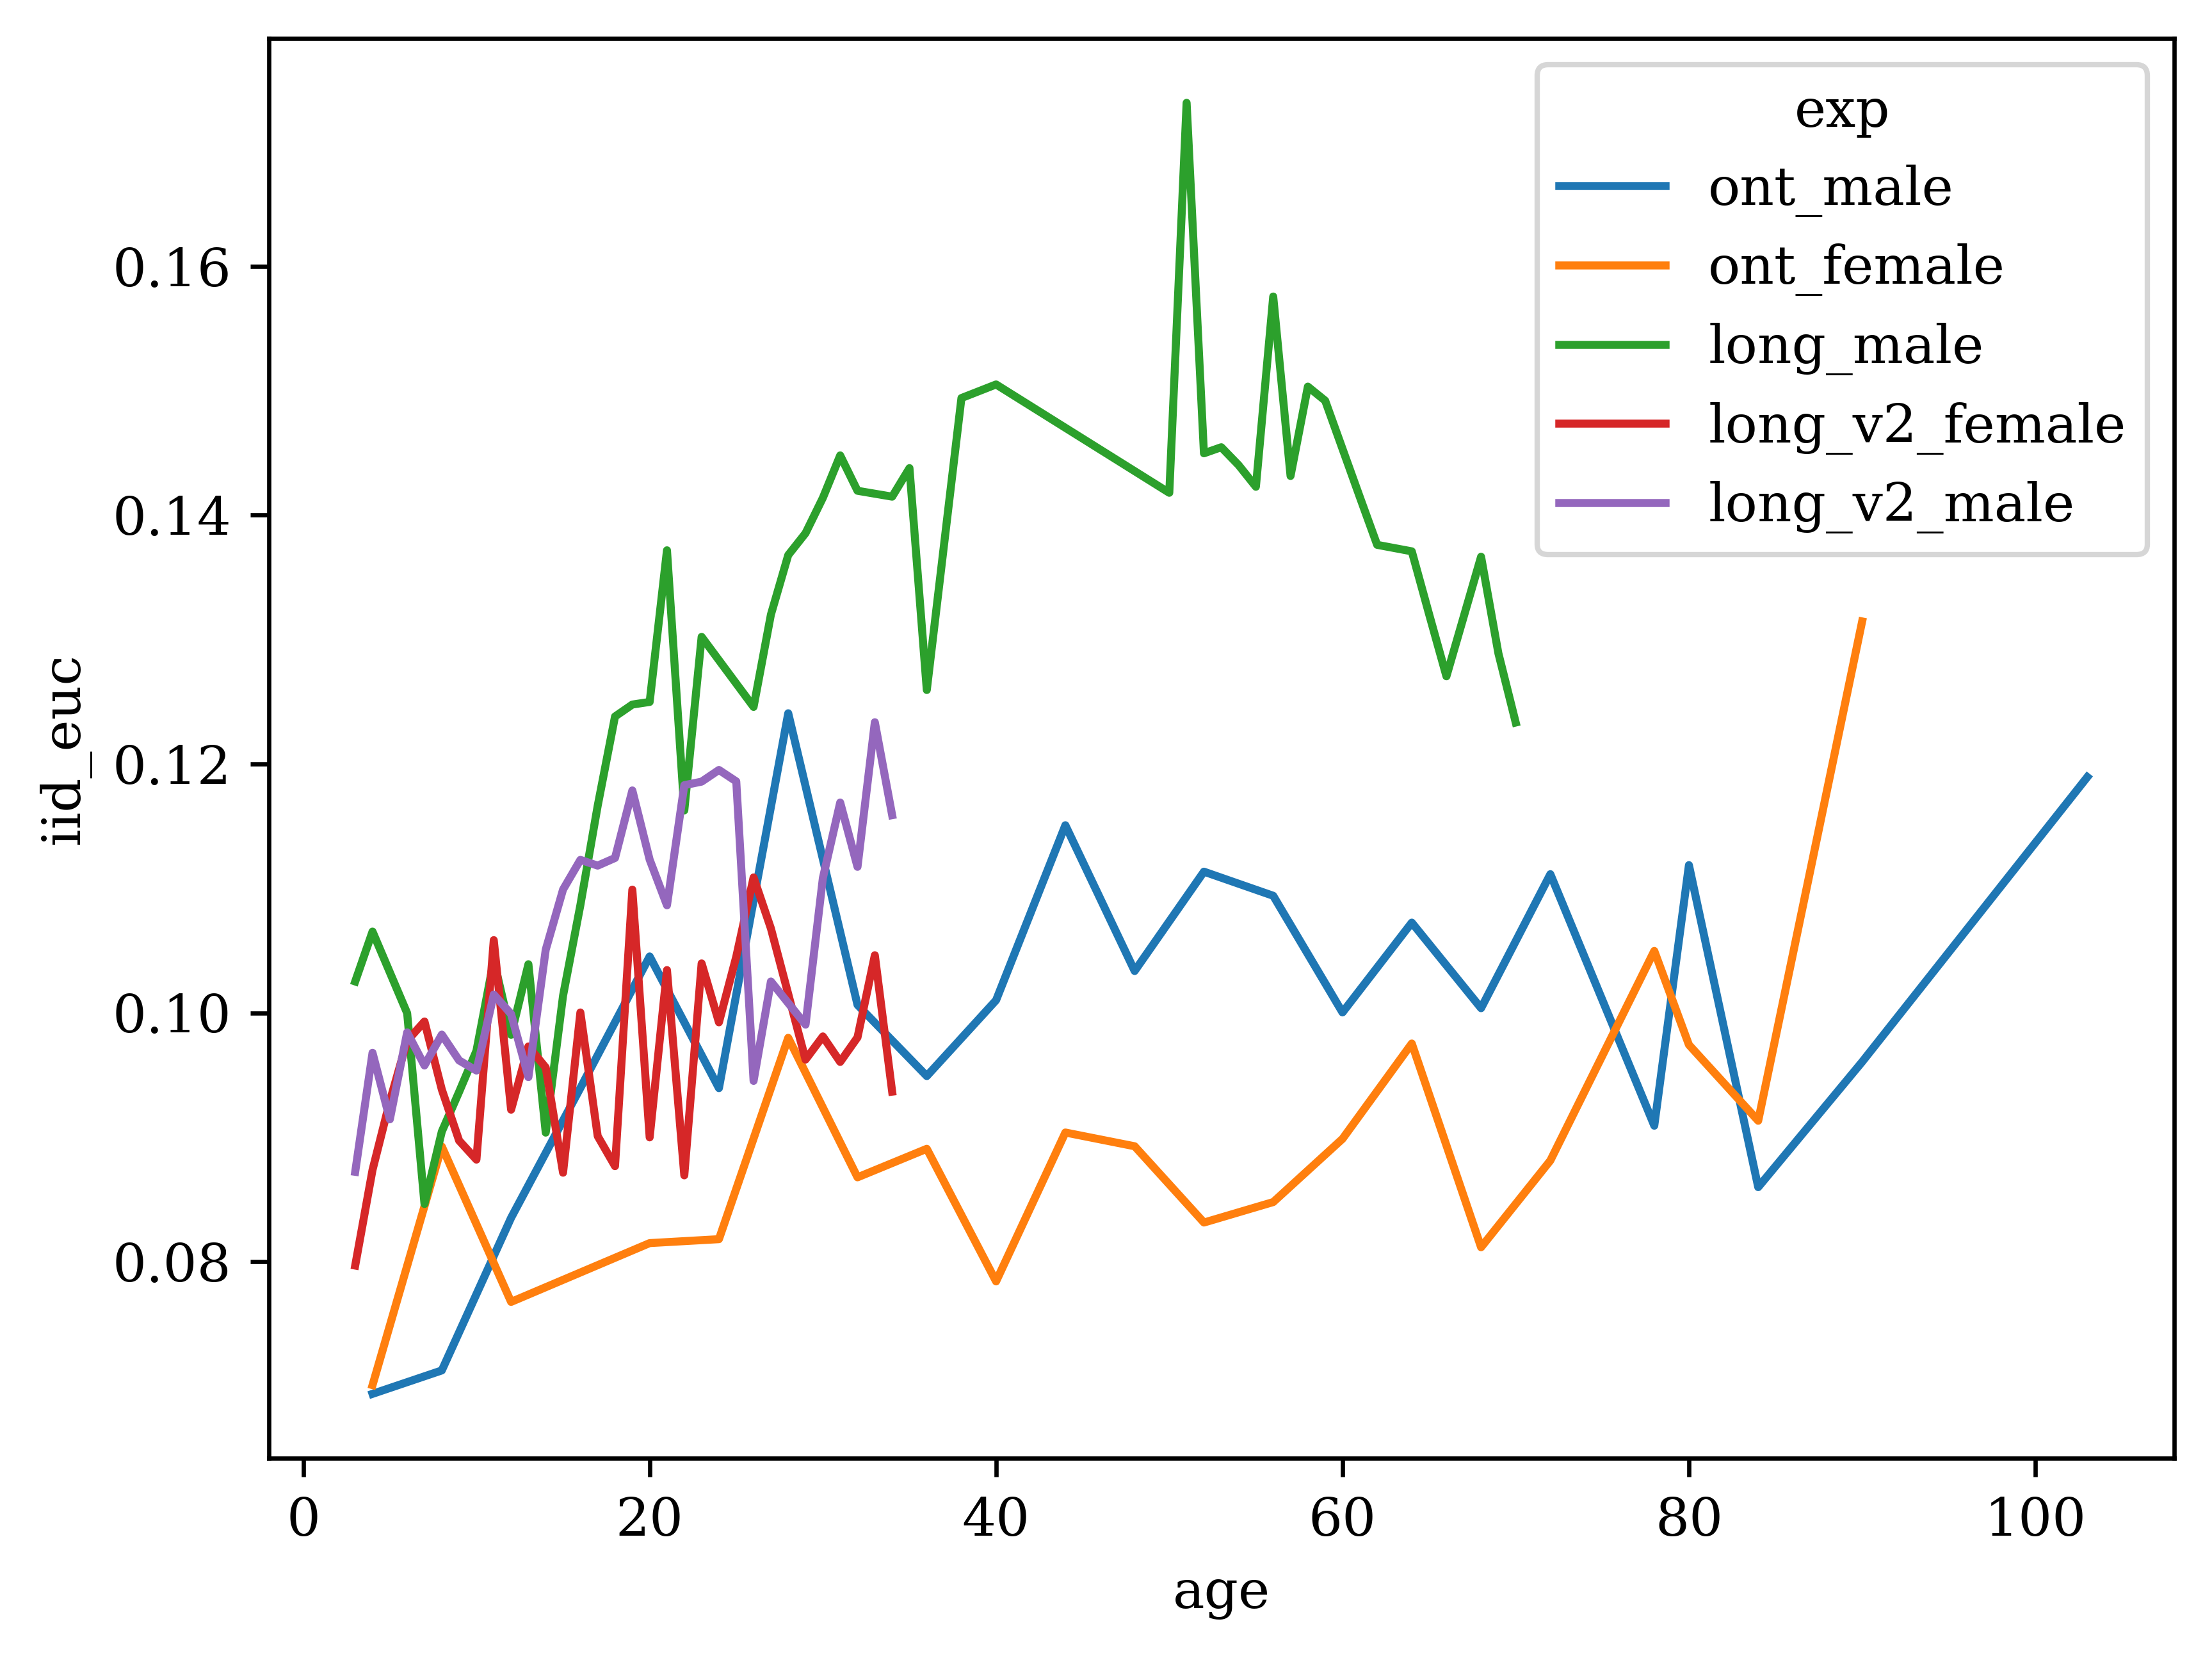

In [33]:
sns.lineplot(data=out.reset_index(), x='age', y='iid_euc', hue='exp')